<a href="https://colab.research.google.com/github/MMENDONNCA/EstudoIrisFlower/blob/main/Projeto_Estudo_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÕES

In [2]:
from ast import While
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# ANÁLISE DA BASE DE DADOS

     sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


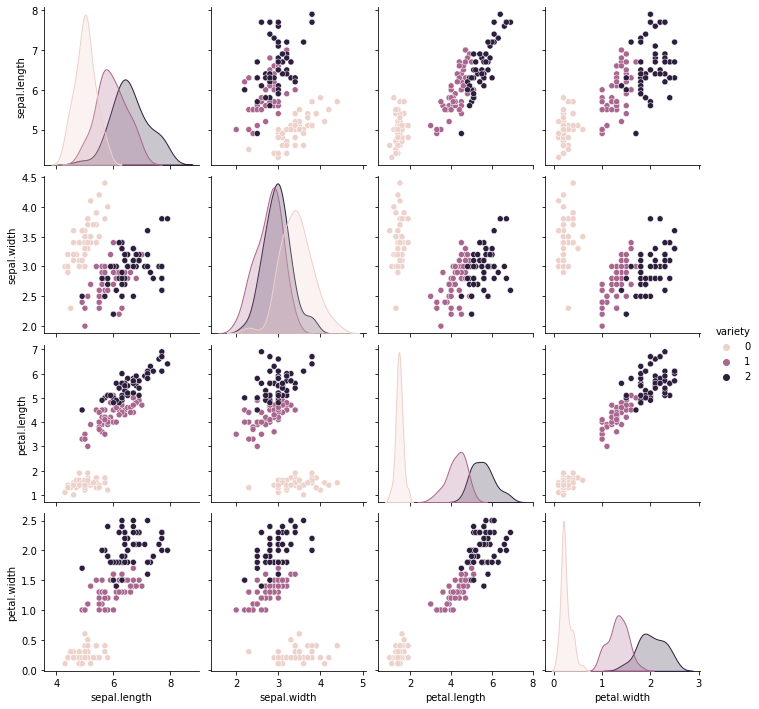

In [3]:
df = pd.read_csv('https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df.variety = pd.factorize(df.variety)[0]
X1 = df.iloc[:,0:4] 
y = df.iloc[:,-1] 
print(df)
sns.pairplot(df, hue = 'variety')

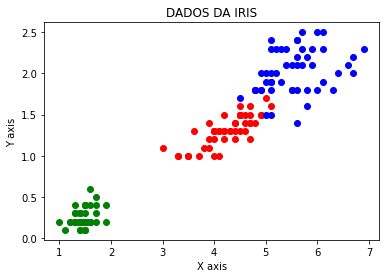

In [ ]:
X = df.iloc[:,2:4]
X = np.array(X)

plt.title("DADOS DA IRIS")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.scatter(X[:, 0:1][y==0], X[0:,1:][y==0], color ="green")
plt.scatter(X[:, 0:1][y==1], X[0:,1:][y==1], color ="red")  
plt.scatter(X[:, 0:1][y==2], X[0:,1:][y==2], color ="blue")    
plt.show()

# TESTE DOS DADOS E ARMAZENAMENTO DE MÉTRICAS

In [ ]:
# CRIAÇÃO DE LISTAS PARA ARAMAZENAR A ACURACIA MÉDIA DE CADA ALGORITMO
lista = []
lista2 = []
lista3 = []

# BOOTSTRAP DE DADOS E TREINAMENTO DE ALGORITMOS, ARMAZENANDO A MÉDIA DE CADA TESTE NAS LISTAS.
for c in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=c)

  clf = LinearDiscriminantAnalysis()
  clf.fit(X_train,y_train)
  lista.append(clf.score(X_test, y_test))

  clf1 = QuadraticDiscriminantAnalysis()
  clf1.fit(X_test, y_test)
  lista2.append(clf1.score(X_test, y_test))

  gnb = GaussianNB()
  y_pred = gnb.fit(X_train, y_train).predict(X_test)
  lista3.append(gnb.score(X_test, y_test))

# MÉDIA E DESVIO PADRÃO DAS ACURACIAS
print('Médias:')
A = np.array(lista)
B = np.mean(A, axis=0)
B1 = np.std(A, axis=0)
print(f'LDA: {B}')


C = np.array(lista2)
D = np.mean(C, axis=0)
D1 = np.std(C, axis=0)
print(f'QDA: {D}')

E = np.array(lista3)
F = np.mean(E, axis=0)
F1 = np.std(E, axis=0)
print(f'GNB: {F}')
print(f'DESVIO PADRÃO: LDA: {B1}, QDA: {D1}, GNB: {F1}')

# PEGANDO O MODELO MAIS PRÓXIMO DA MÉDIA DE CADA ALGORITMO
K1 = []
K2 = []
K3 = []

for c in A:
  K1.append(abs(B - c))

for c in C:
  K2.append(abs(D - c))

for c in E:
  K3.append(abs(F - c))

lista_m = [lista, lista2, lista3]

Médias:
LDA: 0.9572380952380953
QDA: 0.9759047619047618
GNB: 0.96
DESVIO PADRÃO: LDA: 0.01130849619391547, QDA: 0.01077117173707527, GNB: 0.013569339855976205


# PLOTS DOS DISCRIMINANTES DO PROTÓTIPO DE CADA MODELO

## LDA

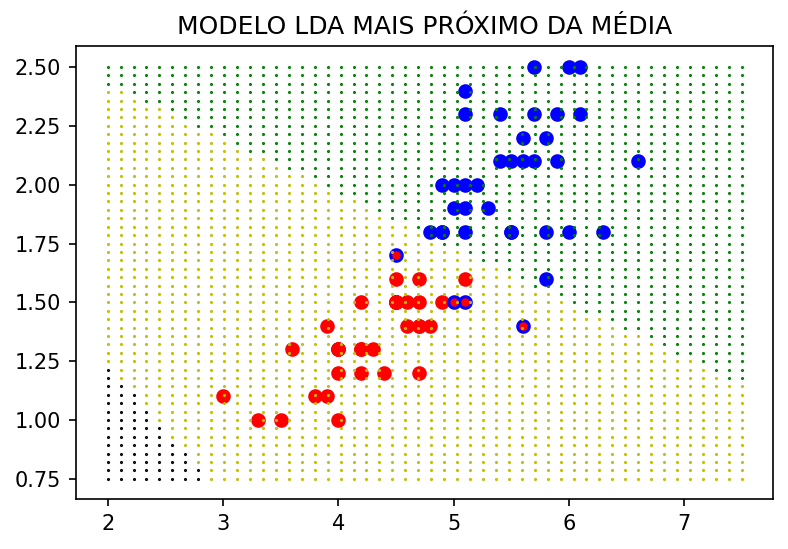

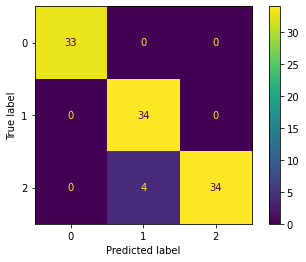

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=int(K1.index(min(K1)))) 
clf.fit(X_train,y_train)

fig = plt.figure(dpi = 150)

cor = ['k.', 'y.','g.']
for a in np.linspace(2, 7.5,50):
  for b in np.linspace(0.75,2.5,50):
    l = clf.predict(np.array([a,b]).reshape(1, 2))
    plt.plot(a, b, cor[l[0]], markersize = 1)

plt.scatter(X_test[:, 0:1][y_test==1], X_test[0:,1:][y_test==1], color ="red", marker = 'o')  
plt.scatter(X_test[:, 0:1][y_test==2], X_test[0:,1:][y_test==2], color ="blue", marker = 'o')  
plt.scatter(X_test[:, 0:1][clf.predict(X_test) == 1], X_test[0:,1:][clf.predict(X_test) == 1], color ="red", marker = '.')  
plt.scatter(X_test[:, 0:1][clf.predict(X_test) == 2], X_test[0:,1:][clf.predict(X_test) == 2], color ="blue", marker = '.')     
plt.title('MODELO LDA MAIS PRÓXIMO DA MÉDIA')

cm = confusion_matrix(y_test, clf.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

## QDA

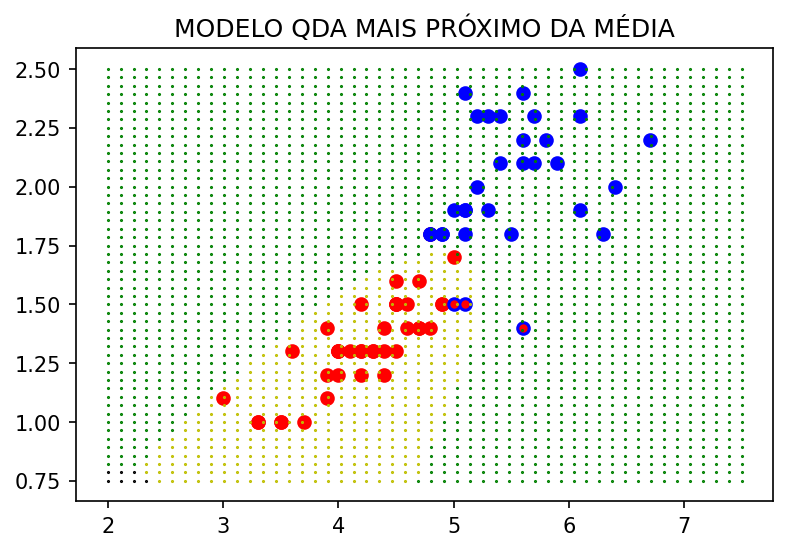

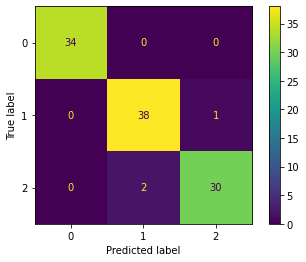

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=int(K2.index(min(K2)))) 
clf1.fit(X_train,y_train)

fig = plt.figure(dpi = 150)

cor = ['k.', 'y.','g.']
for a in np.linspace(2, 7.5,50):
  for b in np.linspace(0.75,2.5,50):
    l = clf1.predict(np.array([a,b]).reshape(1, 2))
    plt.plot(a, b, cor[l[0]], markersize = 1)

plt.scatter(X_test[:, 0:1][y_test==1], X_test[0:,1:][y_test==1], color ="red", marker = 'o')  
plt.scatter(X_test[:, 0:1][y_test==2], X_test[0:,1:][y_test==2], color ="blue", marker = 'o')  
plt.scatter(X_test[:, 0:1][clf.predict(X_test) == 1], X_test[0:,1:][clf.predict(X_test) == 1], color ="red", marker = '.')  
plt.scatter(X_test[:, 0:1][clf.predict(X_test) == 2], X_test[0:,1:][clf.predict(X_test) == 2], color ="blue", marker = '.')     
plt.title('MODELO QDA MAIS PRÓXIMO DA MÉDIA')


cm = confusion_matrix(y_test, clf1.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

##GNB

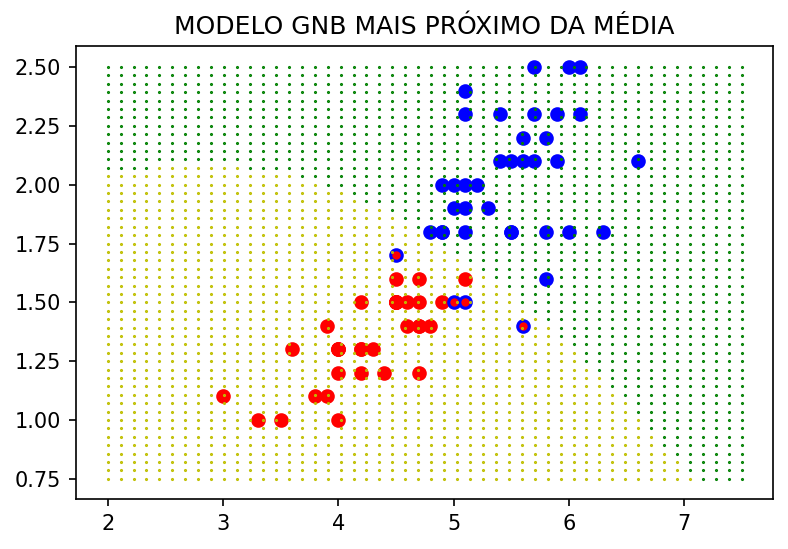

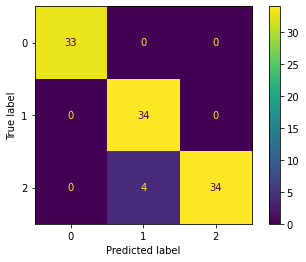

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=int(K3.index(min(K3)))) 
gnb.fit(X_train,y_train)

plt.figure(dpi = 150)

cor = ['k.', 'y.','g.']
for a in np.linspace(2, 7.5,50):
  for b in np.linspace(0.75,2.5,50):
    l = gnb.predict(np.array([a,b]).reshape(1, 2))
    plt.plot(a, b, cor[l[0]], markersize = 1)

plt.scatter(X_test[:, 0:1][y_test==1], X_test[0:,1:][y_test==1], color ="red", marker = 'o')  
plt.scatter(X_test[:, 0:1][y_test==2], X_test[0:,1:][y_test==2], color ="blue", marker = 'o')  
plt.scatter(X_test[:, 0:1][gnb.predict(X_test) == 1], X_test[0:,1:][gnb.predict(X_test) == 1], color ="red", marker = '.')  
plt.scatter(X_test[:, 0:1][gnb.predict(X_test) == 2], X_test[0:,1:][gnb.predict(X_test) == 2], color ="blue", marker = '.')     
plt.title('MODELO GNB MAIS PRÓXIMO DA MÉDIA')


cm = confusion_matrix(y_test, gnb.predict(X_test))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

# BOXPLOT DAS MÉTRICAS DE CADA CLASSIFICADOR

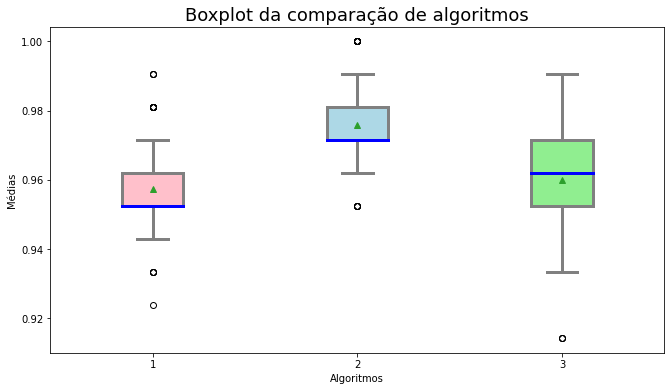

In [ ]:

plt.figure(figsize =(11, 6))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(lista_m, vert = 1, patch_artist = True, showmeans=True,
                      )

# Cor do corpo do boxplot
colors = ['pink', 'lightblue', 'lightgreen', 'red']
for i, bplot in enumerate(bplots['boxes']):
  bplot.set(color='gray', linewidth=3)
  bplot.set(facecolor = colors[i])

# Linhas de contorno
for whisker in bplots['whiskers']:
  whisker.set(color='gray', linewidth=3)

for cap in bplots['caps']:
  cap.set(color='gray', linewidth=3)

for median in bplots['medians']:
  median.set(color='blue', linewidth=3)

plt.title("Boxplot da comparação de algoritmos", loc="center", fontsize=18)
plt.xlabel("Algoritmos")
plt.ylabel("Médias")


plt.show()

Devido ao QDA ter menos outliers, apresentar o menor desvio e ainda assim uma boa acuracia faz com que, apesar de ter o discriminante menos intuitivo, ele seja o escolhido nessa análise.